# Car Price Prediction::

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls '/content/drive/MyDrive/Colab Notebooks/CarPrice_Assignment.csv'

'/content/drive/MyDrive/Colab Notebooks/CarPrice_Assignment.csv'


Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [137]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.optimizers import Adam,SGD
car_data = pd.read_csv('/content/drive/MyDrive/CarPrice_Assignment.csv')

In [138]:
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [139]:
car_data.shape

(205, 26)

In [140]:
car_data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


CHECK MISSING VALUES:

In [141]:
car_data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [142]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [143]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
car_data['fueltype'] = labelencoder.fit_transform(car_data['fueltype'])
car_data['aspiration'] = labelencoder.fit_transform(car_data['aspiration'])
car_data['carbody'] = labelencoder.fit_transform(car_data['carbody'])
car_data['drivewheel'] = labelencoder.fit_transform(car_data['drivewheel'])
car_data['enginelocation'] = labelencoder.fit_transform(car_data['enginelocation'])



In [144]:
car_data['cylindernumber'] = car_data['cylindernumber'].map({'six': 6, 'four': 4,'five': 5})

In [145]:
car_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,two,0,2,0,88.6,168.8,64.1,48.8,2548,dohc,4.0,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,0,two,0,2,0,88.6,168.8,64.1,48.8,2548,dohc,4.0,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,0,two,2,2,0,94.5,171.2,65.5,52.4,2823,ohcv,6.0,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,0,four,3,1,0,99.8,176.6,66.2,54.3,2337,ohc,4.0,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,0,four,3,0,0,99.4,176.6,66.4,54.3,2824,ohc,5.0,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),1,0,four,3,2,0,109.1,188.8,68.9,55.5,2952,ohc,4.0,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,1,1,four,3,2,0,109.1,188.8,68.8,55.5,3049,ohc,4.0,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,1,0,four,3,2,0,109.1,188.8,68.9,55.5,3012,ohcv,6.0,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,0,1,four,3,2,0,109.1,188.8,68.9,55.5,3217,ohc,6.0,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [146]:
car_data['doornumber'] = car_data['doornumber'].map({'two': 2, 'four': 4})

In [147]:
car_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,dohc,4.0,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,dohc,4.0,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,0,2,2,2,0,94.5,171.2,65.5,52.4,2823,ohcv,6.0,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,0,4,3,1,0,99.8,176.6,66.2,54.3,2337,ohc,4.0,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,0,4,3,0,0,99.4,176.6,66.4,54.3,2824,ohc,5.0,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),1,0,4,3,2,0,109.1,188.8,68.9,55.5,2952,ohc,4.0,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,1,1,4,3,2,0,109.1,188.8,68.8,55.5,3049,ohc,4.0,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,1,0,4,3,2,0,109.1,188.8,68.9,55.5,3012,ohcv,6.0,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,0,1,4,3,2,0,109.1,188.8,68.9,55.5,3217,ohc,6.0,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


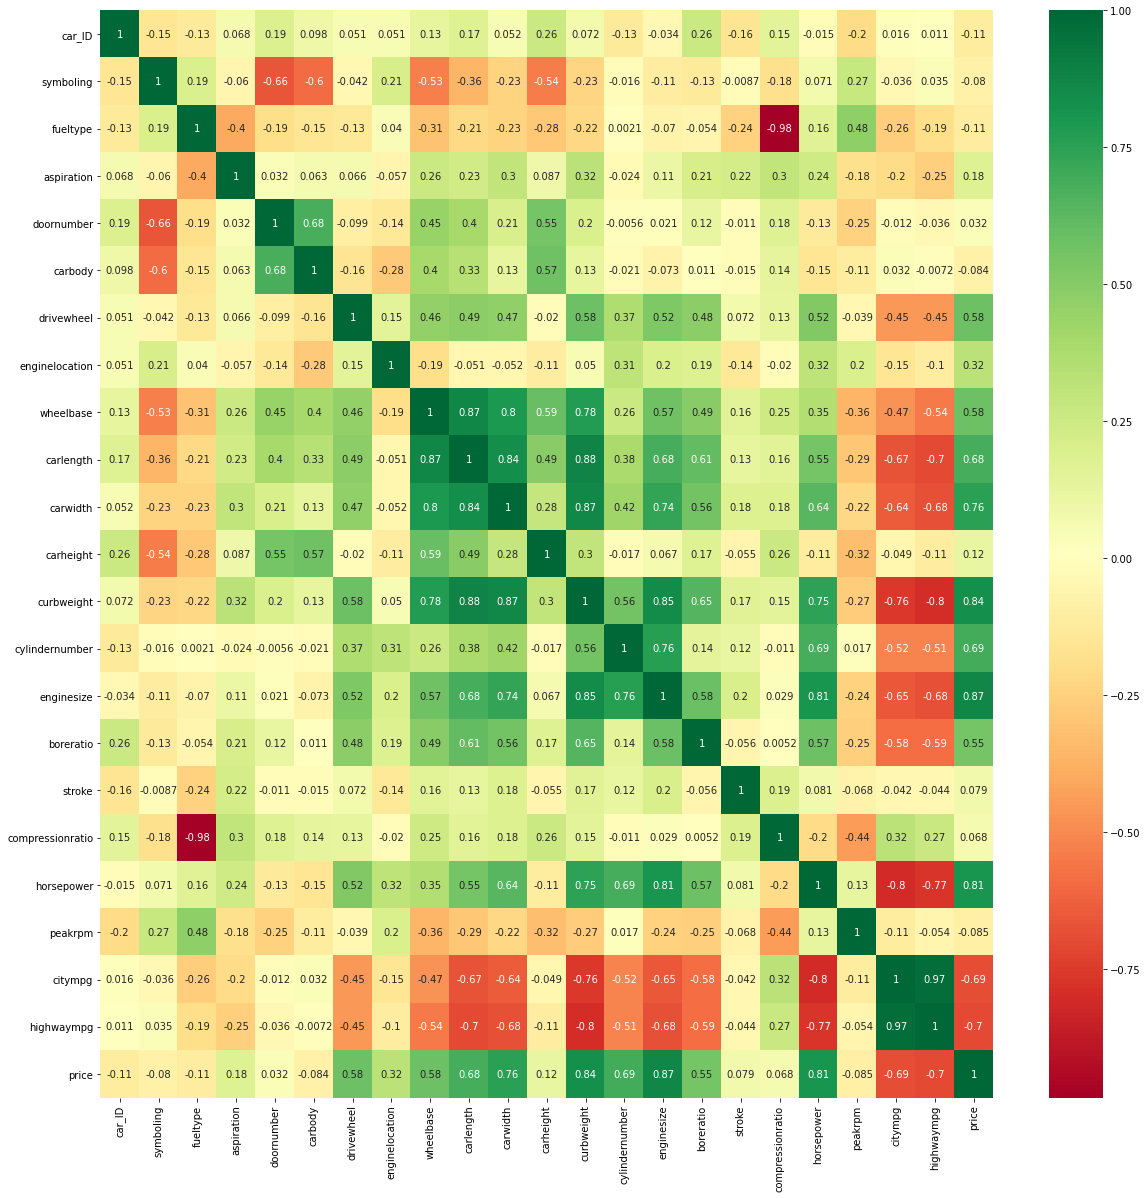

In [148]:
import seaborn as sns
corrmat = car_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(car_data[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [149]:
data1 = car_data[['horsepower','boreratio','enginesize','curbweight','carwidth','carlength','wheelbase','drivewheel', 'price','enginelocation']]

In [150]:
data1.shape

(205, 10)

In [151]:
data1.head()

,horsepower,boreratio,enginesize,curbweight,carwidth,carlength,wheelbase,drivewheel,price,enginelocation
0,111,3.47,130,2548,64.1,168.8,88.6,2,13495.0,0
1,111,3.47,130,2548,64.1,168.8,88.6,2,16500.0,0
2,154,2.68,152,2823,65.5,171.2,94.5,2,16500.0,0
3,102,3.19,109,2337,66.2,176.6,99.8,1,13950.0,0
4,115,3.19,136,2824,66.4,176.6,99.4,0,17450.0,0


Split data

In [152]:
x = ( data1.loc[: , data1.columns != 'price'])
y = (data1.loc[: , data1.columns == 'price'])
from sklearn.model_selection import train_test_split
x_train, x_test , y_train,y_test = train_test_split(x,y, test_size = 0.30 , random_state = 42)

In [153]:
x_train

,horsepower,boreratio,enginesize,curbweight,carwidth,carlength,wheelbase,drivewheel,enginelocation
177,92,3.31,122,2458,66.5,175.6,102.4,1,0
75,175,3.78,140,2910,68.0,178.4,102.7,2,0
174,73,3.27,110,2480,66.5,175.6,102.4,1,0
31,76,2.91,92,1819,63.9,144.6,86.6,1,0
12,121,3.31,164,2710,64.8,176.8,101.2,2,0
...,...,...,...,...,...,...,...,...,...
106,160,3.43,181,3139,67.9,178.5,99.2,2,0
14,121,3.31,164,3055,66.9,189.0,103.5,2,0
92,69,3.15,97,1938,63.8,165.3,94.5,1,0
179,161,3.27,171,3016,67.7,183.5,102.9,2,0


Model definition

In [233]:
from keras import models
from keras import layers
def build_model(act):
  model = models.Sequential()
  model.add(layers.Dense(10, activation= act,input_shape=(x_train.shape[1],)))
  model.add(layers.Dense(8, activation= act))
  model.add(layers.Dense(6, activation= act))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [234]:
build_model('relu').summary()

Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_260 (Dense)            (None, 10)                100       
_________________________________________________________________
dense_261 (Dense)            (None, 8)                 88        
_________________________________________________________________
dense_262 (Dense)            (None, 6)                 54        
_________________________________________________________________
dense_263 (Dense)            (None, 1)                 7         
Total params: 249
Trainable params: 249
Non-trainable params: 0
_________________________________________________________________


In [235]:
build_model('tanh').summary()

Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_264 (Dense)            (None, 10)                100       
_________________________________________________________________
dense_265 (Dense)            (None, 8)                 88        
_________________________________________________________________
dense_266 (Dense)            (None, 6)                 54        
_________________________________________________________________
dense_267 (Dense)            (None, 1)                 7         
Total params: 249
Trainable params: 249
Non-trainable params: 0
_________________________________________________________________


In [236]:
# Regularized model
from keras import regularizers
def build_model_regular(act):
  model = models.Sequential()
  model.add(layers.Dense(10, activation= act,kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001),input_shape=(x_train.shape[1],)))
  model.add(layers.Dense(8, activation= act,kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001)))
  model.add(layers.Dense(6, activation= act,kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001)))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [237]:
build_model_regular('tanh').summary()

Model: "sequential_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_268 (Dense)            (None, 10)                100       
_________________________________________________________________
dense_269 (Dense)            (None, 8)                 88        
_________________________________________________________________
dense_270 (Dense)            (None, 6)                 54        
_________________________________________________________________
dense_271 (Dense)            (None, 1)                 7         
Total params: 249
Trainable params: 249
Non-trainable params: 0
_________________________________________________________________


In [238]:
# dropout model
from keras import regularizers
def build_model_drop(act):
  model = models.Sequential()
  model.add(layers.Dense(10, activation= act,input_shape=(x_train.shape[1],)))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(8, activation= act))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(6, activation= act))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [239]:
build_model_drop('relu').summary()

Model: "sequential_69"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_272 (Dense)            (None, 10)                100       
_________________________________________________________________
dropout_39 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_273 (Dense)            (None, 8)                 88        
_________________________________________________________________
dropout_40 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_274 (Dense)            (None, 6)                 54        
_________________________________________________________________
dropout_41 (Dropout)         (None, 6)                 0         
_________________________________________________________________
dense_275 (Dense)            (None, 1)               

In [240]:
build_model('relu').fit(x_train,y_train ,epochs= 100)

Epoch 1/100
5/5 [==============================] - 1s 3ms/step - loss: 232328018.6667 - mae: 13371.0145
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 260851576.0000 - mae: 13888.2209
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 245329842.6667 - mae: 13734.4484
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 247638898.6667 - mae: 13457.7479
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 228066994.6667 - mae: 13120.8379
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 242335792.0000 - mae: 13612.7375
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 251570280.0000 - mae: 13620.8670
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 252340509.3333 - mae: 13739.4277
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 247187402.6667 - mae: 13623.6940
Epoch 10/100
5/5 [==============================] - 0s 3ms/step 

K-fold validation with relu

In [241]:
import numpy as np
k=4
num_val_samples = len(x_train) // k
num_epochs = 100
all_scores_relu = []
for i in range(k):
  print('processing fold #', i)
  val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate(
  [x_train[:i * num_val_samples],
  x_train[(i + 1) * num_val_samples:]],axis=0)
  partial_train_targets = np.concatenate([y_train[:i * num_val_samples],
  y_train[(i + 1) * num_val_samples:]],axis=0)
  model = build_model('relu')
  model.fit(partial_train_data, partial_train_targets,
  epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores_relu.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


k-fold validation with tanh

In [242]:
import numpy as np
k=4
num_val_samples = len(x_train) // k
num_epochs = 100
all_scores_tanh = []
for i in range(k):
  print('processing fold #', i)
  val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate(
  [x_train[:i * num_val_samples],
  x_train[(i + 1) * num_val_samples:]],axis=0)
  partial_train_targets = np.concatenate([y_train[:i * num_val_samples],
  y_train[(i + 1) * num_val_samples:]],axis=0)
  model = build_model('tanh')
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores_tanh.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


k-fold with regulization 

In [243]:
import numpy as np
k=4
num_val_samples = len(x_train) // k
num_epochs = 100
all_scores_regular = []
for i in range(k):
  print('processing fold #', i)
  val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate(
  [x_train[:i * num_val_samples],
  x_train[(i + 1) * num_val_samples:]],axis=0)
  partial_train_targets = np.concatenate([y_train[:i * num_val_samples],
  y_train[(i + 1) * num_val_samples:]],axis=0)
  model = build_model_regular('relu')
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores_regular.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


k fold with dropout

In [244]:
import numpy as np
k=4
num_val_samples = len(x_train) // k
num_epochs = 100
all_scores_dropout = []
for i in range(k):
  print('processing fold #', i)
  val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate(
  [x_train[:i * num_val_samples],
  x_train[(i + 1) * num_val_samples:]],axis=0)
  partial_train_targets = np.concatenate([y_train[:i * num_val_samples],
  y_train[(i + 1) * num_val_samples:]],axis=0)
  model = build_model_drop('relu')
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores_dropout.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [245]:
all_scores_relu

[3680.859375, 3710.135009765625, 3510.373779296875, 3428.279541015625]

In [246]:
all_scores_tanh

[12240.7783203125, 12312.9462890625, 14276.0537109375, 14623.373046875]

In [247]:
all_scores_regular

[3522.928466796875, 3885.4580078125, 3840.75, 3222.52099609375]

In [248]:
all_scores_dropout

[3523.90234375, 3898.416015625, 4713.90185546875, 4161.0234375]

training on the training data

In [249]:
model_relu = build_model('relu')
model_relu.fit(x_train, y_train,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_relu.evaluate(x_test, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 13831749238784.0000 - mae: 1905762.8750


In [250]:
model_relu = build_model('tanh')
model_relu.fit(x_train, y_train,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_relu.evaluate(x_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 235297648.0000 - mae: 12884.2139


In [251]:
model_relu = build_model_drop('relu')
model_relu.fit(x_train, y_train,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_relu.evaluate(x_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 2254627930112.0000 - mae: 771636.8750


In [252]:
model_relu = build_model_regular('relu')
model_relu.fit(x_train, y_train,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_relu.evaluate(x_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 8032450248704.0000 - mae: 1452865.0000
